<a href="https://colab.research.google.com/github/viansebastian/Universiteit/blob/main/PCD_Assignment3_Vian_Sebastian_496698.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pylab as plt
from PIL import Image
from skimage import io
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


Text(0.5, 1.0, 'Original Image')

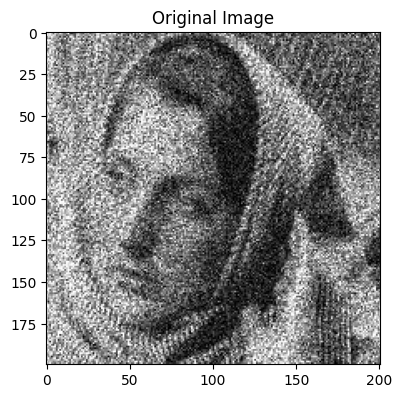

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/noisy.jpg')
ori_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ori_image2 = ori_image

plt.figure(figsize=(25, 10))

plt.subplot(1,5,1)
plt.imshow(ori_image2, cmap='gray')
plt.title('Original Image')

In [ ]:
def thresholding(image, threshold):
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      pixel = image[i, j]
      if pixel >= threshold:
        image[i, j] = 255
      else:
        image[i, j] = 0
  return image

In [ ]:
# To count pixel values and frequency
def countPixels(image):
  unique_values, counts = np.unique(image, return_counts = True)
  return unique_values, counts

In [ ]:
countPixels(image)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

Text(0.5, 1.0, 'Thresholded')

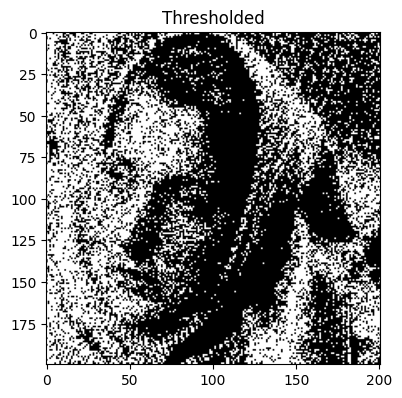

In [ ]:
thresholded_image = thresholding(ori_image, 130)

plt.figure(figsize=(25, 10))

plt.subplot(1,5,1)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded')

In [ ]:
def dilation(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result = np.zeros((image_height, image_width), dtype=np.uint8)

    # Define the center of the kernel
    anchor_x, anchor_y = kernel_height // 2, kernel_width // 2

    for i in range(image_height):
        for j in range(image_width):
            if image[i, j] > 0:
                # Iterate over the kernel and check for overlap with the image
                for k in range(kernel_height):
                    for l in range(kernel_width):
                        # Calculate coordinates in the image for the current kernel element
                        x = i + k - anchor_x
                        y = j + l - anchor_y
                        if 0 <= x < image_height and 0 <= y < image_width and kernel[k, l] > 0:
                            result[x, y] = 1

    return result

In [ ]:
def erosion(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result = np.zeros((image_height, image_width), dtype=np.uint8)

    # Define the center of the kernel
    anchor_x, anchor_y = kernel_height // 2, kernel_width // 2

    for i in range(image_height):
        for j in range(image_width):
            if image[i, j] > 0:
                # Assume all pixels in the neighborhood match the kernel value (1)
                all_match = True

                # Iterate over the kernel and check for overlap with the image
                for k in range(kernel_height):
                    for l in range(kernel_width):
                        # Calculate coordinates in the image for the current kernel element
                        x = i + k - anchor_x
                        y = j + l - anchor_y

                        # Check if the pixel in the image is outside the image bounds
                        # or if it doesn't match the kernel value
                        if (
                            x < 0
                            or x >= image_height
                            or y < 0
                            or y >= image_width
                            or image[x, y] == 0
                        ):
                            all_match = False
                            break  # Exit the inner loop

                    if not all_match:
                        break  # Exit the outer loop

                if all_match:
                    result[i, j] = 1
    return result

In [ ]:
def opening(image, kernel):
  eroded = erosion(image, kernel)
  result = dilation(eroded, kernel)
  return result

In [ ]:
def closing(image, kernel):
  dilated = dilation(image, kernel)
  result = erosion(dilated, kernel)
  return result

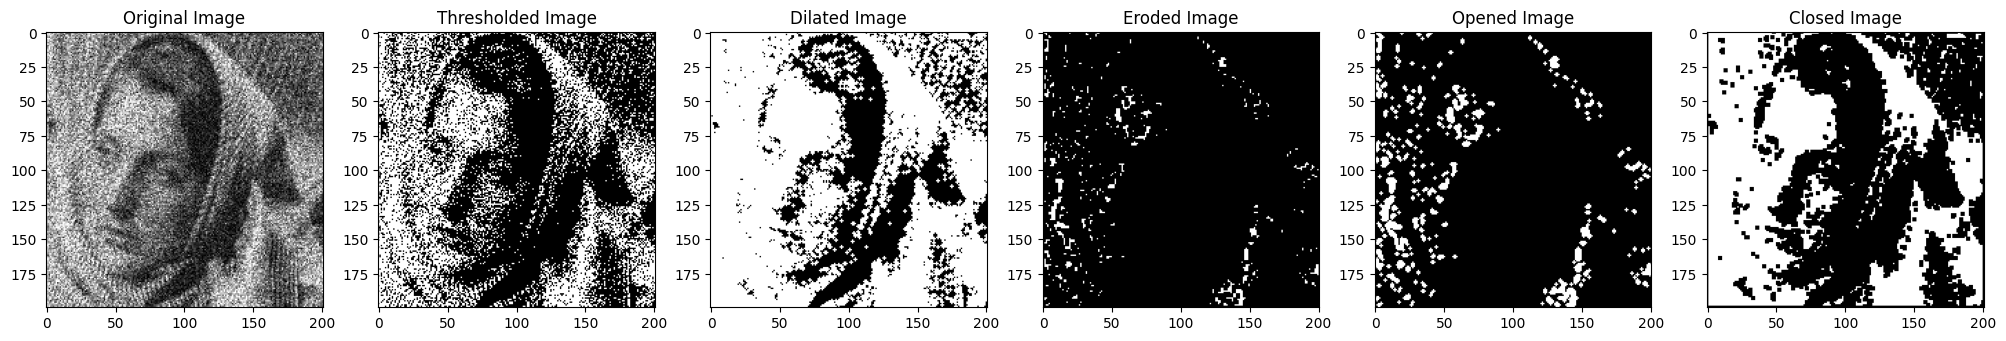

In [ ]:
kernels = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], dtype = float)

dilated_image = dilation(thresholded_image, kernels)
eroded_image = erosion(thresholded_image, kernels)
opened_image = opening(thresholded_image, kernels)
closed_image = closing(thresholded_image, kernels)

plt.figure(figsize=(25, 10))

plt.subplot(1,6,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,6,2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')

plt.subplot(1,6,3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.subplot(1,6,4)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.subplot(1,6,5)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')

plt.subplot(1,6,6)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

plt.show()


Comparison:

The segmentation method I used is Global Thresholding, simply because of the simplicity and how well it works for my case.

I plotted all the images as such for easier evaluation and comparison on different morphological process on the thresholded image.

In my opinion, for better info, the closed process here is superior for noisy image.

The dilated image resulted in a significant increase brightness.

Both eroded and opened image resulted in almost total darkness on every detail.